In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [343]:
train=pd.read_csv("C:\\Users\\SMART\\Desktop\\pract\\TF CHALLENGE\\day3\\loan_status11.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [345]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [346]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


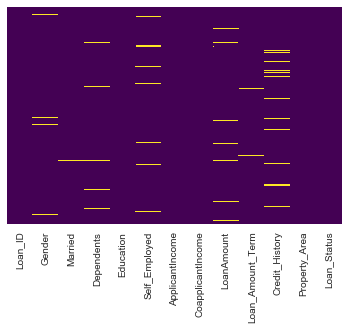

In [347]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#yellow lines indicates missing information in the data

In [348]:
sns.set_style('whitegrid')

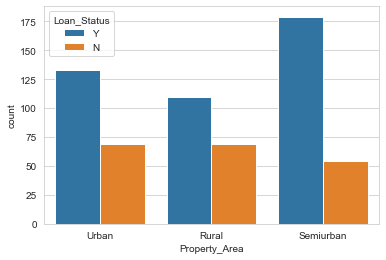

In [349]:
sns.countplot(x='Property_Area',data=train,hue='Loan_Status')


#use different colors palette=stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_
#1=survived -->550+
#0=not survieved ---> 330+

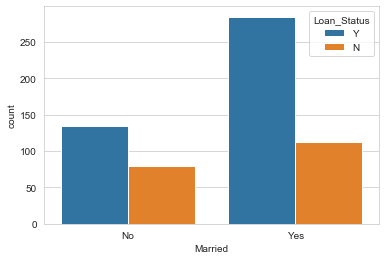

In [350]:
sns.countplot(x='Married',data=train,hue='Loan_Status')

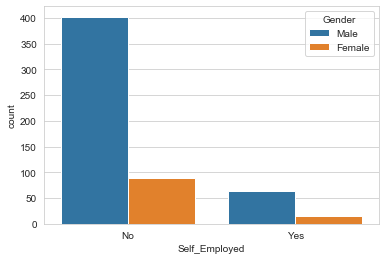

In [351]:
sns.countplot(x='Self_Employed',data=train,hue='Gender')

#use different colors palette=stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_
#1=survived -->550+
#0=not survieved ---> 330+

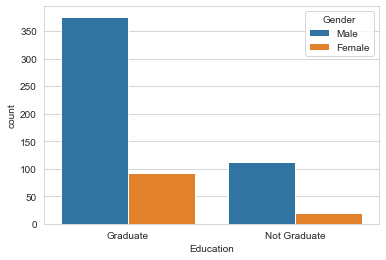

In [352]:
sns.countplot(x='Education',data=train,hue='Gender')

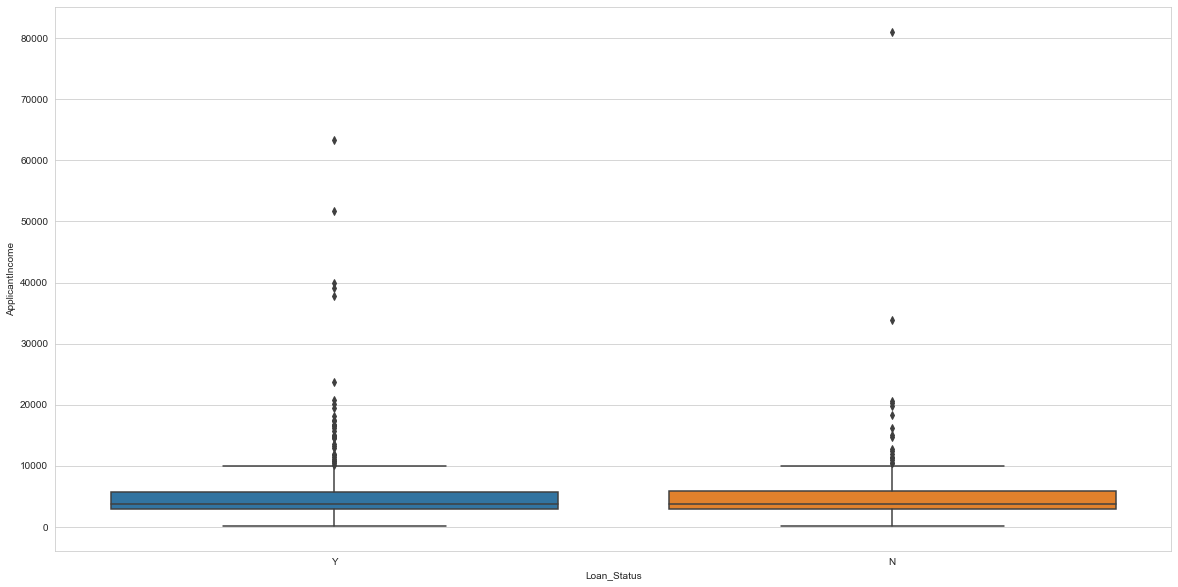

In [353]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train)

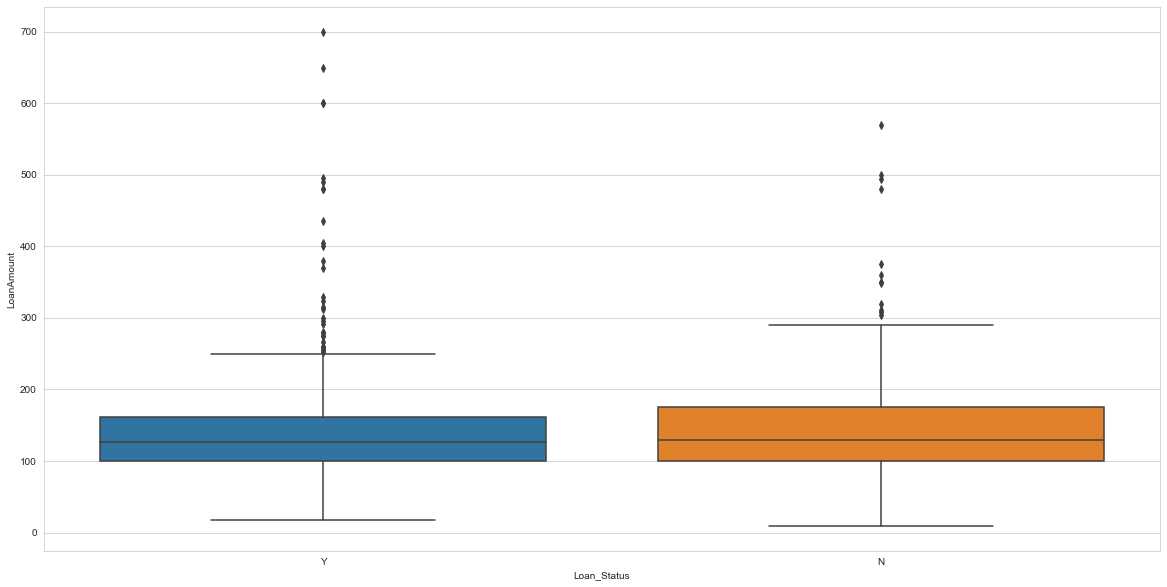

In [354]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Loan_Status',y='LoanAmount',data=train)

In [355]:
def impute_loan(cols):
    LoanA=cols[0]
    Loan_status=cols[1]
    
    if pd.isnull(Loan_status):
        if Loan_status == 1:
            return 130

        else:
            return 110
    else:
        return LoanA
    
    

In [356]:
train['LoanAmount']=train[['LoanAmount','Education']].apply(impute_loan,axis=1)

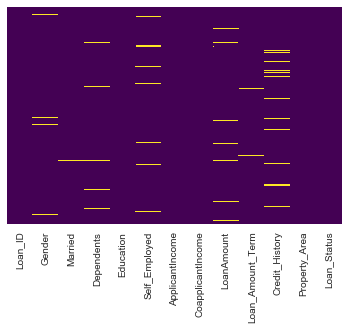

In [357]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [358]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [359]:
train.drop('Credit_History',axis=1,inplace=True)

In [360]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y


In [361]:
train.dropna(inplace=True)

In [362]:
gender=pd.get_dummies(train['Gender'],drop_first=True)
Marry=pd.get_dummies(train['Married'],drop_first=True)
Educt=pd.get_dummies(train['Education'],drop_first=True)
Loan_status=pd.get_dummies(train['Loan_Status'],drop_first=True)
self=pd.get_dummies(train['Self_Employed'],drop_first=True)
prop=pd.get_dummies(train['Property_Area'],drop_first=True)


In [363]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y


In [364]:
train=pd.concat([train,gender,Marry,Educt,self,prop,Loan_status],axis=1)

In [365]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,Rural,N,1,1,0,0,0,0,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y,1,1,0,1,0,1,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y,1,1,1,0,0,1,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y,1,0,0,0,0,1,1
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y,1,1,0,1,0,1,1


In [366]:

train.drop(['Gender','Education','Married','Self_Employed','Loan_ID','Property_Area','Loan_Status'],axis=1,inplace=True)

In [367]:
train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
1,1.0,4583,1508.0,128.0,360.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1,1,0,1,0,1,1
3,0.0,2583,2358.0,120.0,360.0,1,1,1,0,0,1,1
4,0.0,6000,0.0,141.0,360.0,1,0,0,0,0,1,1
5,2.0,5417,4196.0,267.0,360.0,1,1,0,1,0,1,1


In [368]:
train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Male', 'Yes', 'Not Graduate', 'Yes', 'Semiurban',
       'Urban', 'Y'],
      dtype='object')

In [369]:
train.rename(columns={'Y':'Loan_status','Semiurban':'Property_Area','Male':'Gender','Yes':'Married'},inplace=True)

In [370]:
train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender', 'Married', 'Not Graduate', 'Married',
       'Property_Area', 'Urban', 'Loan_status'],
      dtype='object')

In [373]:
name_change=train.columns

In [401]:
train.head(8)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Not Graduate,Married,Property_Area,Urban,Loan_status
1,1.0,4583,1508.0,128.0,360.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1,1,0,1,0,1,1
3,0.0,2583,2358.0,120.0,360.0,1,1,1,0,0,1,1
4,0.0,6000,0.0,141.0,360.0,1,0,0,0,0,1,1
5,2.0,5417,4196.0,267.0,360.0,1,1,0,1,0,1,1
6,0.0,2333,1516.0,95.0,360.0,1,1,1,0,0,1,1
7,3.0,3036,2504.0,158.0,360.0,1,1,0,0,1,0,0
8,2.0,4006,1526.0,168.0,360.0,1,1,0,0,0,1,1


In [380]:
X=train.drop('Loan_status',axis=1)
y=train['Loan_status']

In [381]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [468]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=59)

In [469]:
len(y_test)

53

In [470]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [471]:
predictions=logmodel.predict(X_test)

In [472]:
from sklearn.metrics import classification_report

In [473]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.83      1.00      0.91        43

    accuracy                           0.83        53
   macro avg       0.91      0.55      0.54        53
weighted avg       0.86      0.83      0.77        53



In [474]:
from sklearn.metrics import confusion_matrix

In [475]:
cm=confusion_matrix(y_test,predictions)
cm

array([[ 1,  9],
       [ 0, 43]], dtype=int64)

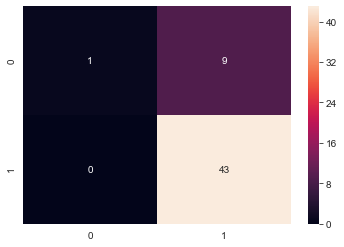

In [476]:
#81% accuracy
sns.heatmap(cm,annot=True)
plt.show()

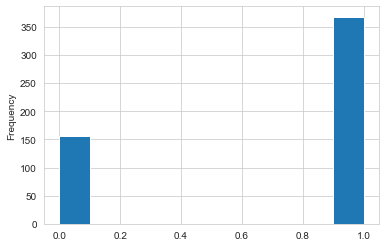

In [402]:
train['Loan_status'].plot.hist()

##Random forest

In [508]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=77)
model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=77,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [509]:
model.score(X_test,y_test)

0.7735849056603774